In [1]:
# X(x1,x2) y (0/1/2/3)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
Num = 100

In [3]:
x_1 = np.random.normal(-3,1,size = (Num)) #满足高斯分布，参数是中心点，方差，size  
x_2 = np.random.normal(-3,1,size = (Num)) #shift tab组合键,函数用法
y = np.zeros(Num)
c_0 = np.array([x_1,x_2,y])

In [4]:
x_1 = np.random.normal(3,1,size = (Num)) #满足高斯分布，参数是中心点，方差，size  
x_2 = np.random.normal(-3,1,size = (Num)) #shift tab组合键,函数用法
y = np.ones(Num)
c_1 = np.array([x_1,x_2,y])

In [5]:
x_1 = np.random.normal(-3,1,size = (Num)) #满足高斯分布，参数是中心点，方差，size  
x_2 = np.random.normal(3,1,size = (Num)) #shift tab组合键,函数用法
y = np.ones(Num)*2
c_2 = np.array([x_1,x_2,y])

In [6]:
x_1 = np.random.normal(3,1,size = (Num)) #满足高斯分布，参数是中心点，方差，size  
x_2 = np.random.normal(3,1,size = (Num)) #shift tab组合键,函数用法
y = np.ones(Num)*3
c_3 = np.array([x_1,x_2,y])

In [7]:
c_0 = c_0.T
c_1 = c_1.T
c_2 = c_2.T
c_3 = c_3.T
c_0.shape

(100, 3)

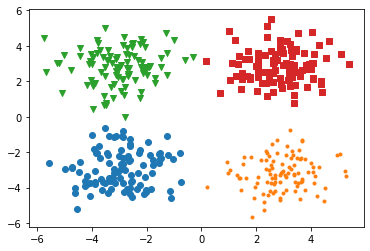

In [8]:
plt.scatter(c_0[:,0],c_0[:,1],marker='o')
plt.scatter(c_1[:,0],c_1[:,1],marker='.')
plt.scatter(c_2[:,0],c_2[:,1],marker='v')
plt.scatter(c_3[:,0],c_3[:,1],marker='s')

In [9]:
All_data = np.concatenate((c_0,c_1,c_2,c_3))
All_data.shape
np.random.shuffle(All_data)

In [10]:
train_data_X = All_data[:300,:2] # 取前300个做训练集，后100个作为测试集
train_data_y = All_data[:300,-1].reshape(300,1)
test_data_X = All_data[300:,:2]
test_data_y = All_data[300:,-1].reshape(100,1)
train_data_X.shape,train_data_y.shape,test_data_X.shape,test_data_y.shape

((300, 2), (300, 1), (100, 2), (100, 1))

In [11]:
# y = w1*x1+w2*x2+b
# 0 = w1*x1+w2*y+b
W = np.random.rand(4,2) # 4条直线，4组w1和w2,4组b值
W.shape

(4, 2)

In [12]:
bias = np.random.rand(1,4)
bias.shape

(1, 4)

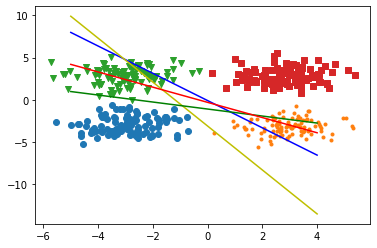

In [13]:
plt.scatter(c_0[:,0],c_0[:,1],marker='o')
plt.scatter(c_1[:,0],c_1[:,1],marker='.')
plt.scatter(c_2[:,0],c_2[:,1],marker='v')
plt.scatter(c_3[:,0],c_3[:,1],marker='s')
x = np.arange(-5,5)
y1 = -(W[0,0]*x+bias[0,0])/W[0,1]
plt.plot(x,y1,'b')
y2 = -(W[1,0]*x+bias[0,1])/W[1,1]
plt.plot(x,y2,'y')
y3 = -(W[2,0]*x+bias[0,2])/W[2,1]
plt.plot(x,y3,'g')
y4 = -(W[3,0]*x+bias[0,3])/W[3,1]
plt.plot(x,y4,'r')

In [14]:
# softmax(x) = e^x/sum(e^x)
#对所有元素求和
def softmax(z):
    return np.exp(z)/sum(np.exp(z))

In [15]:
a = np.array([1,2,3])
softmax(a)

array([0.09003057, 0.24472847, 0.66524096])

In [16]:
b = np.array([1,2,3,4,5,6]).reshape(2,3)   
softmax(b)

array([[0.04742587, 0.04742587, 0.04742587],
       [0.95257413, 0.95257413, 0.95257413]])

In [17]:
#不是对所有元素求和
def softmax(z):   
    exp = np .exp(z)
     #在第二个维度求和，保持原有的形状
    sum_exp = np.sum(np.exp(z),axis = 1,keepdims = True)  
    return exp/sum_exp

In [18]:
b = np.array([1,2,3,4,5,6]).reshape(2,3)   
softmax(b)

array([[0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096]])

In [19]:
# one_hot
# teep 1,2,3,4 [0,0,1,0]
def one_hot(temp):
    # unique只留下不重复出现的不同元素
    one_hot = np.zeros((len(temp),len(np.unique(temp))))
    one_hot[np.arange(len(temp)),temp.astype(np.int).T]= 1
    return one_hot

In [20]:
# 计算y_hat
def compute_y_hat(W,X,b):
    return np.dot(X,W.T)+ b

In [21]:
train_data_X.shape,W.shape,bias.shape

((300, 2), (4, 2), (1, 4))

In [22]:
# 计算交叉熵
def cross_entropy(y,y_hat):
    loss = -(1/len(y))*np.sum(y*np.log(y_hat))
    return loss

In [25]:
# w = w - lr*grad
lr = 0.001
All_loss = []
for i in range(10000):
    # 计算loss
    X = train_data_X
    y = one_hot(train_data_y)
    y_hat = softmax(compute_y_hat(W,X,bias))
    loss = cross_entropy(y,y_hat)
    All_loss.append(loss)
    # 计算梯度
    grad_w = (1/len(X))*np.dot(X.T,(y_hat - y))
    grad_b = (1/len(X))*np.sum(y_hat - y)
    # 更新参数
    W = W - lr*grad_w.T
    bias = bias - lr*grad_b
    # 输出
    if i%100 == 1:
        print("i : %d, loss :%f"%(i,loss))

i : 1, loss :1.833425
i : 101, loss :1.474004
i : 201, loss :1.185395
i : 301, loss :0.952549
i : 401, loss :0.767252
i : 501, loss :0.624359
i : 601, loss :0.518215
i : 701, loss :0.441206
i : 801, loss :0.385277
i : 901, loss :0.343816
i : 1001, loss :0.312166
i : 1101, loss :0.287266
i : 1201, loss :0.267130
i : 1301, loss :0.250460
i : 1401, loss :0.236381
i : 1501, loss :0.224292
i : 1601, loss :0.213766
i : 1701, loss :0.204494
i : 1801, loss :0.196245
i : 1901, loss :0.188843
i : 2001, loss :0.182153
i : 2101, loss :0.176068
i : 2201, loss :0.170501
i : 2301, loss :0.165383
i : 2401, loss :0.160658
i : 2501, loss :0.156278
i : 2601, loss :0.152204
i : 2701, loss :0.148401
i : 2801, loss :0.144842
i : 2901, loss :0.141502
i : 3001, loss :0.138360
i : 3101, loss :0.135397
i : 3201, loss :0.132597
i : 3301, loss :0.129946
i : 3401, loss :0.127432
i : 3501, loss :0.125044
i : 3601, loss :0.122771
i : 3701, loss :0.120605
i : 3801, loss :0.118539
i : 3901, loss :0.116564
i : 4001, lo

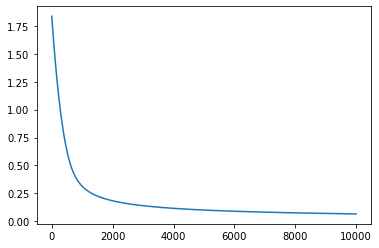

In [26]:
plt.plot(All_loss)

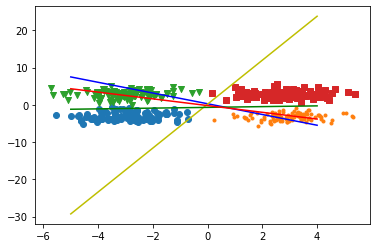

In [27]:
plt.scatter(c_0[:,0],c_0[:,1],marker='o')
plt.scatter(c_1[:,0],c_1[:,1],marker='.')
plt.scatter(c_2[:,0],c_2[:,1],marker='v')
plt.scatter(c_3[:,0],c_3[:,1],marker='s')
x = np.arange(-5,5)
y1 = -(W[0,0]*x+bias[0,0])/W[0,1]
plt.plot(x,y1,'b')
y2 = -(W[1,0]*x+bias[0,1])/W[1,1]
plt.plot(x,y2,'y')
y3 = -(W[2,0]*x+bias[0,2])/W[2,1]
plt.plot(x,y3,'g')
y4 = -(W[3,0]*x+bias[0,3])/W[3,1]
plt.plot(x,y4,'r')

In [28]:
# 测试集预测
test_data_y.shape

(100, 1)

In [29]:
def predict(X):
    y_hat = softmax(compute_y_hat(W,X,bias))
    return np.argmax(y_hat,axis = 1)[:,np.newaxis]

In [30]:
np.sum(predict(test_data_X)== test_data_y)/len(test_data_y)

1.0